<a href="https://colab.research.google.com/github/SANTHIYA-PROJ/HOUSE-PRICING-PROJECT/blob/main/HOUSE_PRICING_DATAHANDLING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
# Load the dataset
df = pd.read_csv('Housing.csv')
# Show the first few rows of the dataset
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Check the structure of the dataset
print("Shape of the dataset:", df.shape)
print("Columns:", df.columns)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())


Shape of the dataset: (545, 13)
Columns: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Data Types:
 price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [3]:
# Drop rows with missing values
df_cleaned = df.dropna()


In [8]:
# Label encoding for categorical columns
label_encoder = LabelEncoder()

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']  # Replace with your categorical columns

for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])
    df_cleaned.head()
    # Print the entire dataframe
print(df_cleaned)


        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

In [9]:
#EDA
df_cleaned.describe()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


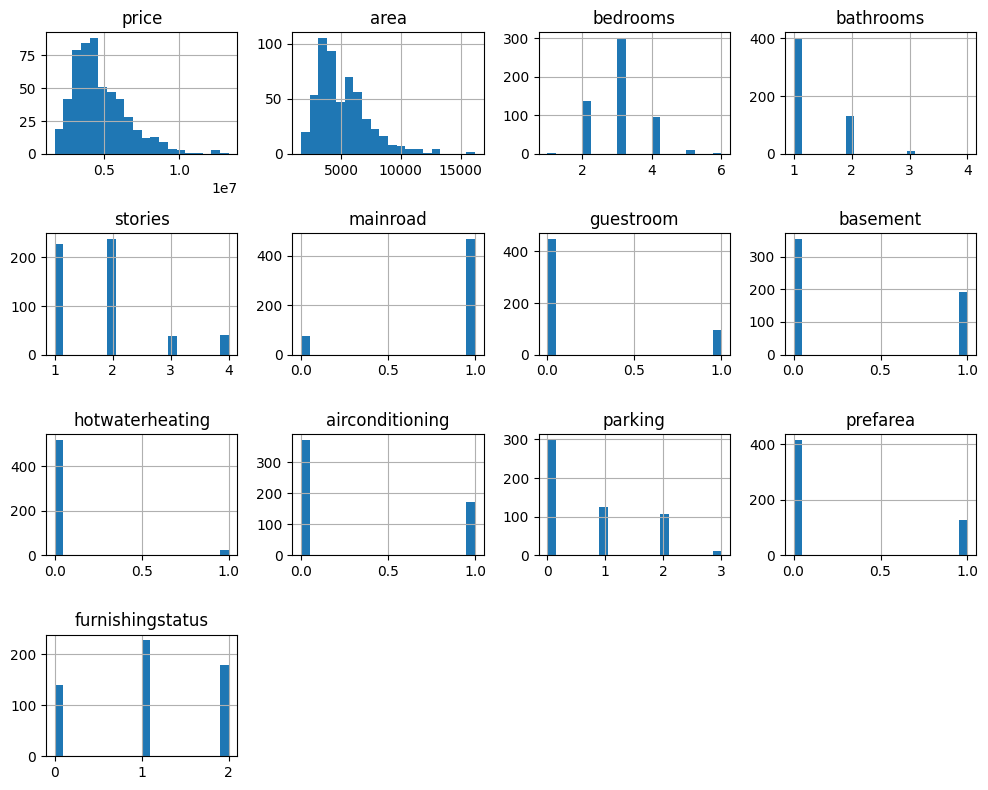

In [10]:
df_cleaned.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


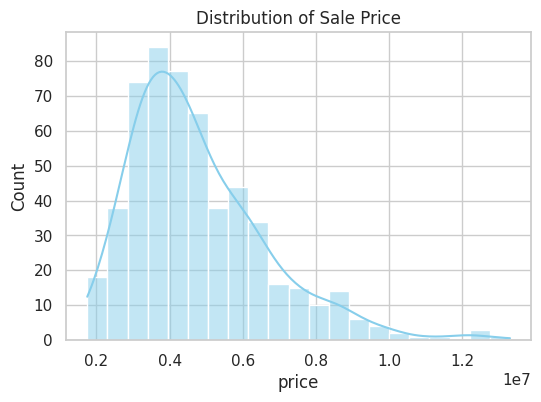

In [12]:
df = pd.read_csv('Housing.csv')

sns.set(style='whitegrid')

plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True, color='skyblue')  # Update 'price' if the column name differs
plt.title("Distribution of Sale Price")
plt.show()

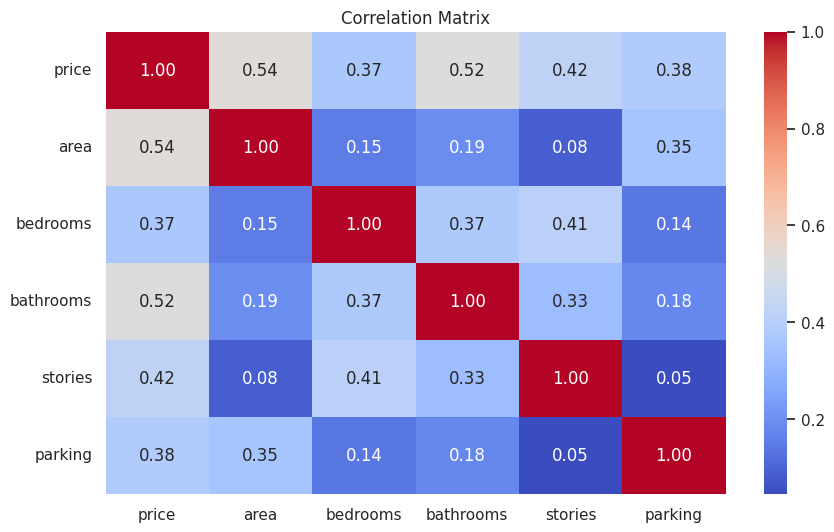

In [13]:
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


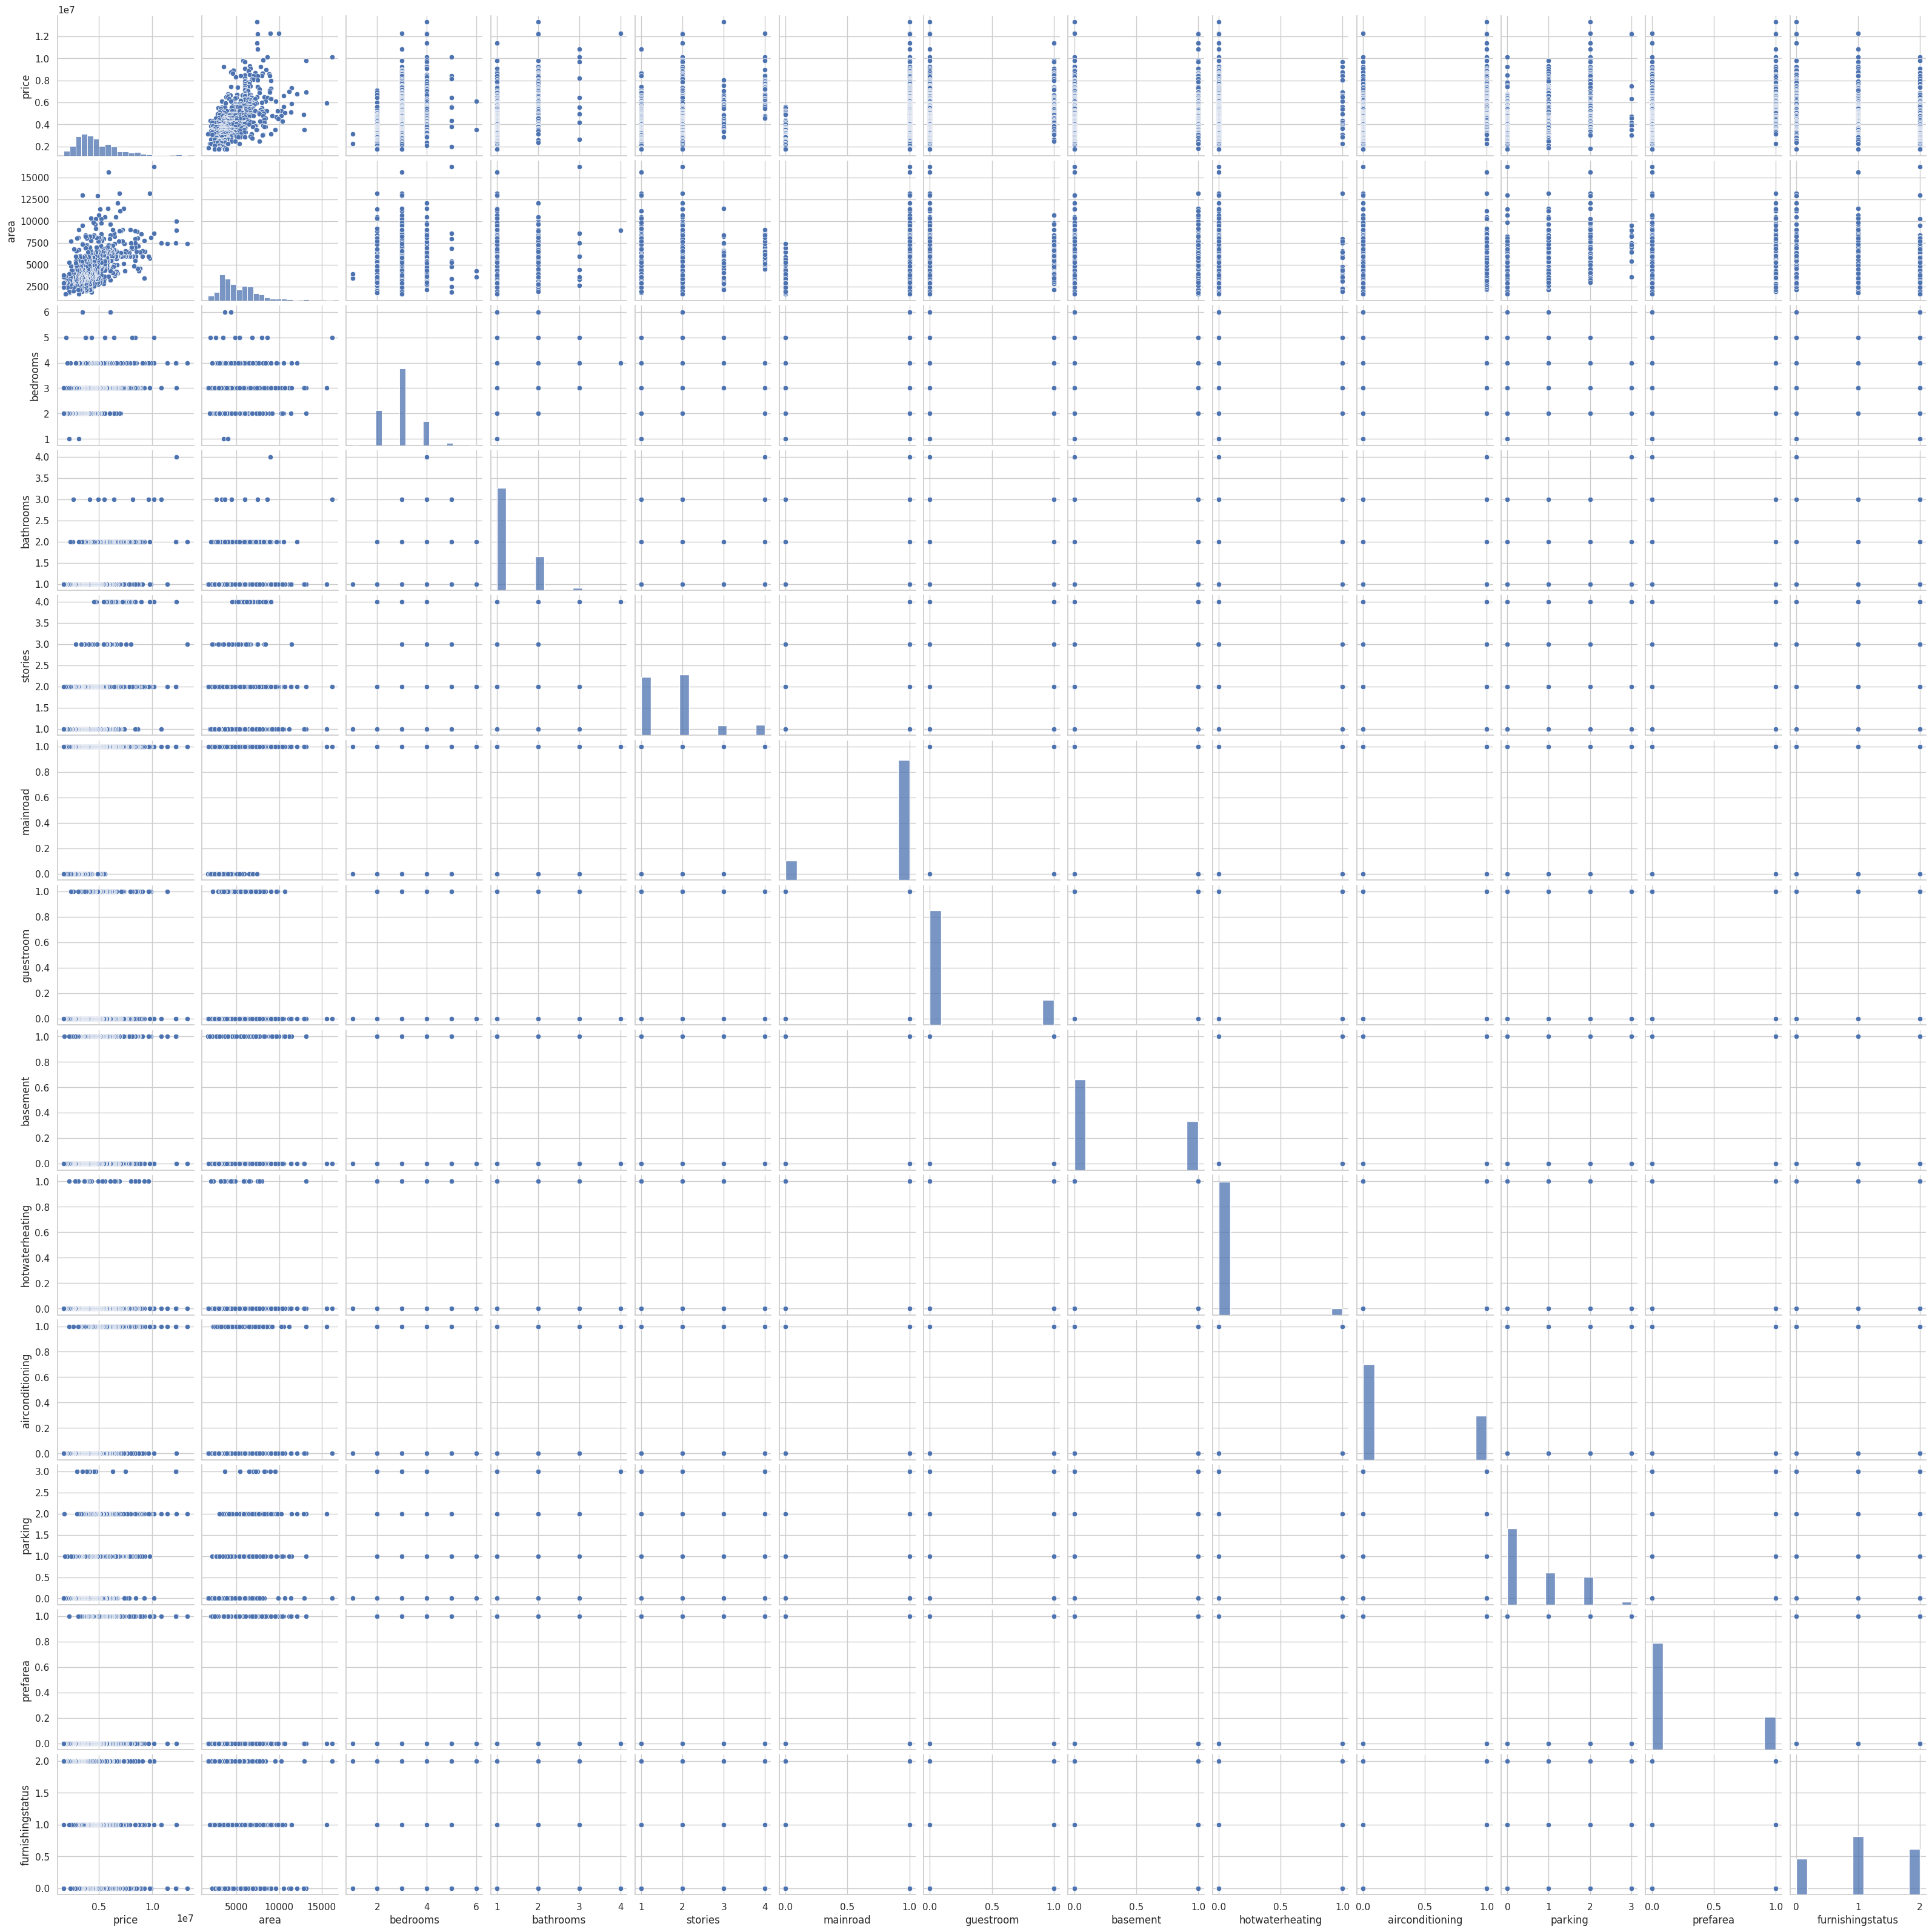

In [14]:
sns.pairplot(df_cleaned)
plt.show()


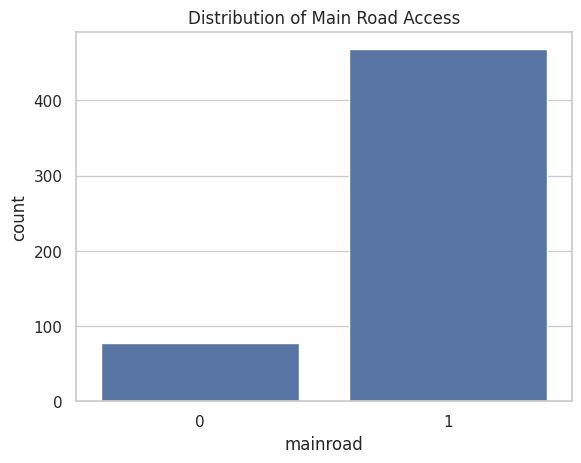

In [15]:
sns.countplot(x='mainroad', data=df_cleaned)
plt.title("Distribution of Main Road Access")
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

# Assuming X are the features and y is the target variable
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target

# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")


Training data size: (436, 12)
Testing data size: (109, 12)
